In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Netflix Dataset.csv")


print("Shape of dataset:", df.shape)
df.info()
df.head()


Shape of dataset: (7789, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
# Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year from Release_Date
df['Year'] = df['Release_Date'].dt.year

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values (optional)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)



Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      98
Rating             7
Duration           0
Type               0
Description        0
Year              98
dtype: int64


C:\Users\shali\AppData\Local\Temp\ipykernel_21456\1263530068.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
C:\Users\shali\AppData\Local\Temp\ipykernel_21456\1263530068.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [3]:
# Fill missing values with appropriate replacements
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Not Available', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)

# Drop rows where Release_Date is missing (only ~1.2% of data)
df.dropna(subset=['Release_Date'], inplace=True)

# Recalculate Year after cleaning
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Verify cleaning
print("✅ Missing values after cleaning:\n")
print(df.isnull().sum())


✅ Missing values after cleaning:

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Year            0
dtype: int64


C:\Users\shali\AppData\Local\Temp\ipykernel_21456\25333323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
C:\Users\shali\AppData\Local\Temp\ipykernel_21456\25333323.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

C:\Users\shali\AppData\Local\Temp\ipykernel_21456\2232996855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='coolwarm')


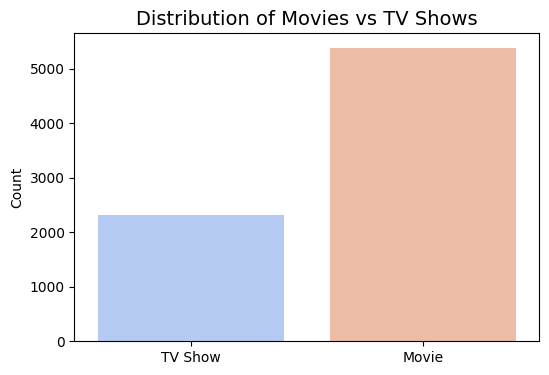

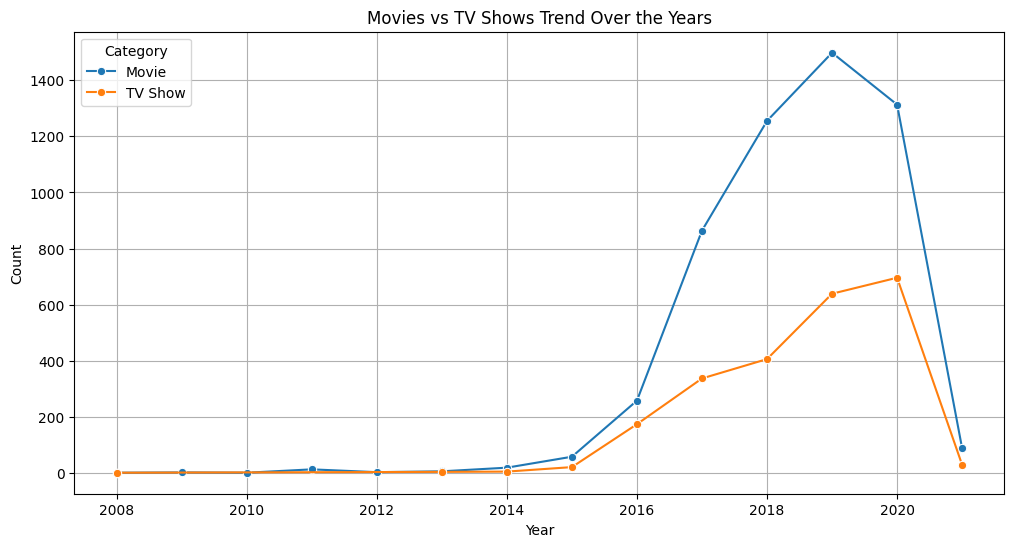

In [4]:
# Count of Movies and TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='coolwarm')
plt.title("Distribution of Movies vs TV Shows", fontsize=14)
plt.xlabel("")
plt.ylabel("Count")
plt.show()

# Yearly trend
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


C:\Users\shali\AppData\Local\Temp\ipykernel_21456\686449166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')


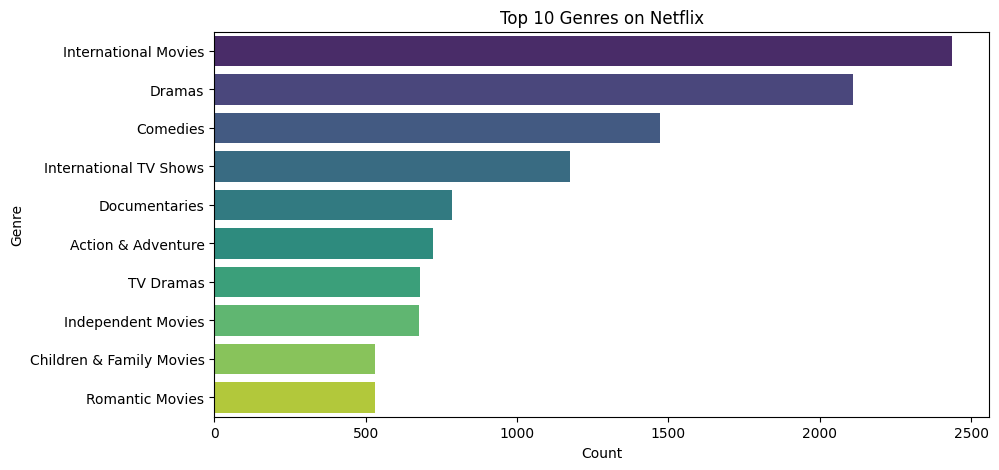

In [5]:
# Split genres (comma-separated in Type column)
from collections import Counter

genre_list = []
for types in df['Type'].dropna():
    for genre in types.split(','):
        genre_list.append(genre.strip())

genre_counts = pd.DataFrame(Counter(genre_list).most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


C:\Users\shali\AppData\Local\Temp\ipykernel_21456\1736947109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')


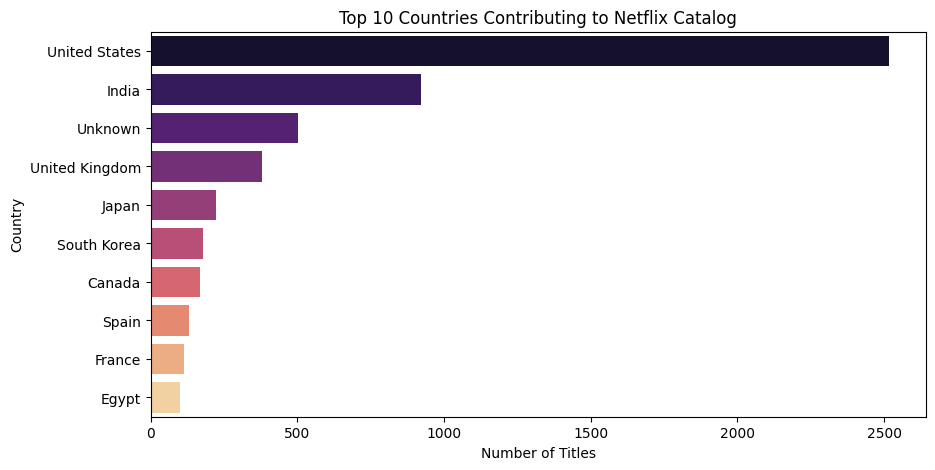

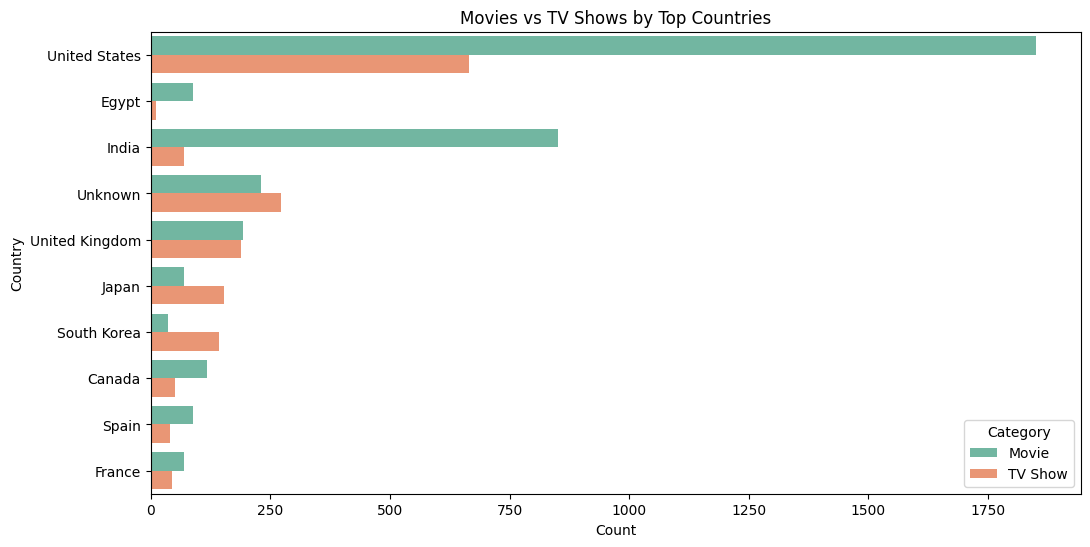

In [6]:
# Top 10 countries with most content
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.title("Top 10 Countries Contributing to Netflix Catalog")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# Country-wise Movies vs TV Shows
top_countries = df[df['Country'].isin(country_counts.index)]
plt.figure(figsize=(12,6))
sns.countplot(data=top_countries, y='Country', hue='Category', palette='Set2')
plt.title("Movies vs TV Shows by Top Countries")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title="Category")
plt.show()


C:\Users\shali\AppData\Local\Temp\ipykernel_21456\722616610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='cool')


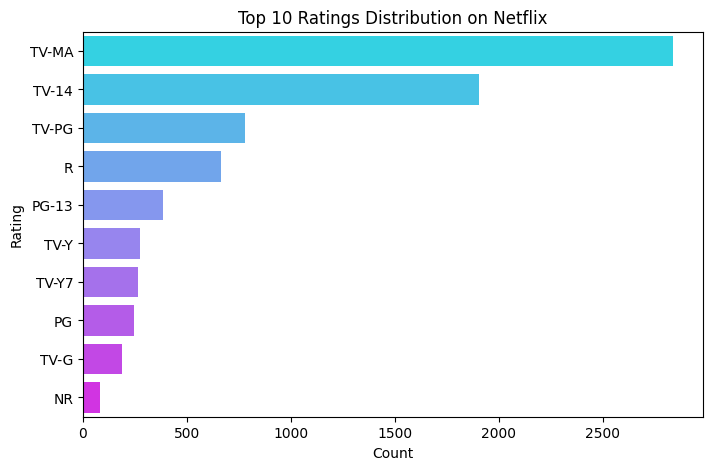

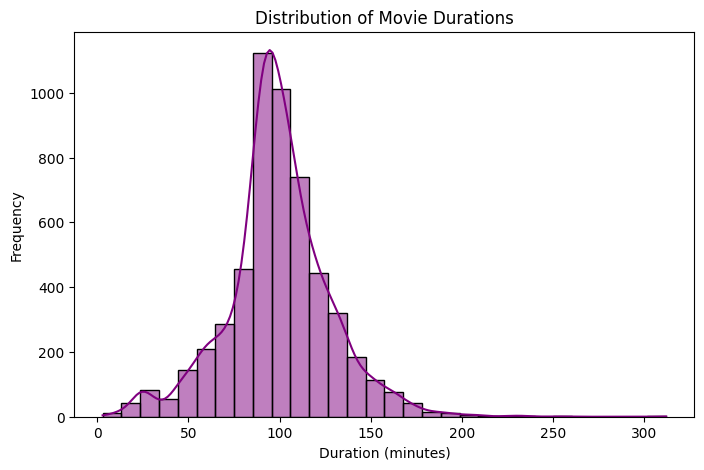

In [7]:
# Top 10 ratings
rating_counts = df['Rating'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='cool')
plt.title("Top 10 Ratings Distribution on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

# Movie duration analysis
movie_durations = df[df['Category'] == 'Movie'].copy()
movie_durations['Minutes'] = movie_durations['Duration'].str.replace(' min', '').astype(float)
plt.figure(figsize=(8,5))
sns.histplot(movie_durations['Minutes'].dropna(), bins=30, kde=True, color='purple')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


In [8]:
print("📊 Key Insights Summary:\n")

print("1️⃣ Total Movies:", len(df[df['Category']=='Movie']))
print("2️⃣ Total TV Shows:", len(df[df['Category']=='TV Show']))
print("3️⃣ Dataset covers years from", int(df['Year'].min()), "to", int(df['Year'].max()))
print("\n4️⃣ Top 5 Genres:\n", genre_counts.head())
print("\n5️⃣ Top 5 Countries:\n", country_counts.head())


📊 Key Insights Summary:

1️⃣ Total Movies: 5379
2️⃣ Total TV Shows: 2312
3️⃣ Dataset covers years from 2008 to 2021

4️⃣ Top 5 Genres:
                     Genre  Count
0    International Movies   2437
1                  Dramas   2108
2                Comedies   1472
3  International TV Shows   1176
4           Documentaries    786

5️⃣ Top 5 Countries:
 Country
United States     2516
India              922
Unknown            503
United Kingdom     381
Japan              222
Name: count, dtype: int64


In [9]:
print("\n💡 Strategic Recommendations:")
print("""
- Netflix should continue investing in high-performing genres such as Drama, Comedy, and International content.
- TV Shows have grown steadily since 2015 — original series and local-language shows can boost engagement.
- U.S. and India dominate the content catalog, but emerging markets (like South Korea and Spain) show potential.
- More balanced representation across countries can enhance Netflix’s global appeal.
- Movie durations mostly range around 90–120 minutes — focusing on this sweet spot can retain viewer attention.
""")



💡 Strategic Recommendations:

- Netflix should continue investing in high-performing genres such as Drama, Comedy, and International content.
- TV Shows have grown steadily since 2015 — original series and local-language shows can boost engagement.
- U.S. and India dominate the content catalog, but emerging markets (like South Korea and Spain) show potential.
- More balanced representation across countries can enhance Netflix’s global appeal.
- Movie durations mostly range around 90–120 minutes — focusing on this sweet spot can retain viewer attention.

